<a href="https://colab.research.google.com/github/Swagat-modder/DA-DS-portfolio/blob/main/Churn_prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [29]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [30]:
from sklearn.model_selection import train_test_split as tts
X=df.drop(columns=['Exited','CustomerId', 'RowNumber','Surname'],axis=1)
y=df['Exited']
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

In [31]:
X_train.shape

(8000, 11)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  int64  
 9   Geography_Spain    10000 non-null  int64  
 10  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [34]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
# model=Sequential()
# model.add(Dense(3,activation='sigmoid',input_dim=11))
# model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#model compiling
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8728 - loss: 0.3110 - val_accuracy: 0.8556 - val_loss: 0.3457
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8693 - loss: 0.3195 - val_accuracy: 0.8587 - val_loss: 0.3450
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8724 - loss: 0.3118 - val_accuracy: 0.8575 - val_loss: 0.3455
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 0.3178 - val_accuracy: 0.8600 - val_loss: 0.3449
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8734 - loss: 0.3164 - val_accuracy: 0.8594 - val_loss: 0.3453
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8676 - loss: 0.3178 - val_accuracy: 0.8606 - val_loss: 0.3450
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8587 - loss: 0.3394 - val_accuracy: 0.8587 - val_loss: 0.3458
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3228 - val_accu

In [51]:
model.layers[0].get_weights()

[array([[ 0.16202103, -0.11030635, -0.21265621, -0.01728204,  0.04396513,
         -0.00316138, -0.06768691,  0.39631525,  0.07453245, -0.07617312,
          0.08901756],
        [ 0.5063894 , -0.16407833,  0.07914943,  0.65737367, -0.3665163 ,
         -0.4811654 ,  0.32369822, -0.89099234, -0.77091646,  0.95750296,
          0.20690593],
        [ 0.10495152, -0.16640623,  0.0901257 ,  0.04467579,  0.108121  ,
         -0.01506823,  0.05905819,  0.21139562,  0.20140372, -0.02565542,
         -0.38245985],
        [-0.0131157 ,  0.25227854, -0.1496039 , -0.3905702 ,  0.02671278,
         -0.22478095,  0.7653713 , -0.31406087, -0.3295903 ,  0.00346454,
         -0.25474212],
        [ 0.29297647,  0.47066596,  0.85836476, -0.9376375 ,  0.8488886 ,
          0.5932558 ,  0.9591851 ,  0.11364329, -0.01551071,  0.98373055,
          0.7197664 ],
        [ 0.15374865,  0.16563725, -0.151288  ,  0.05419518,  0.1584402 ,
          0.07411733, -0.05681518, -0.06858257,  0.03769959,  0.0129597

In [52]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [53]:
y_pred=np.where(y_log>0.5,1,0)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.862

In [56]:
import matplotlib.pyplot as plt

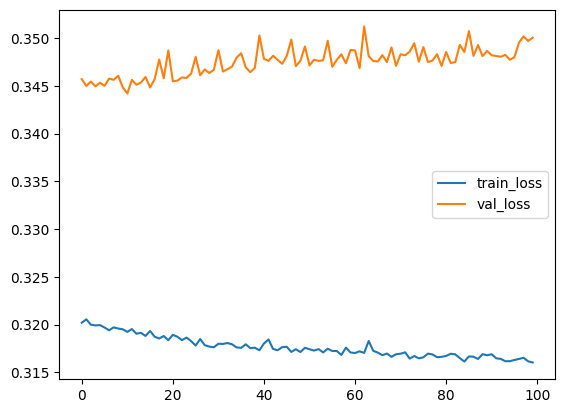

In [57]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()